In [2]:
%load_ext pyinstrument
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
import ariel_load
import tqdm
import copy

local


In [3]:
#%%pyinstrument
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

(1099, 1)

4030268273
TransitParams(comment='', Rs=0.6809845995556713, Ms=0.6411924286150976, Ts=5036.802725707321, Mp=1.3843609094470386, e=0.0, w=90.0, Rp=0.0, P=122.68543079978187, t0=None, sma=14.962026560125478, i=88.94934672415361, limb_dark='quadratic', u=None, expose_e_and_w=False)
sanity back
{'main': CompoundNamed(comment='.signal.main')}


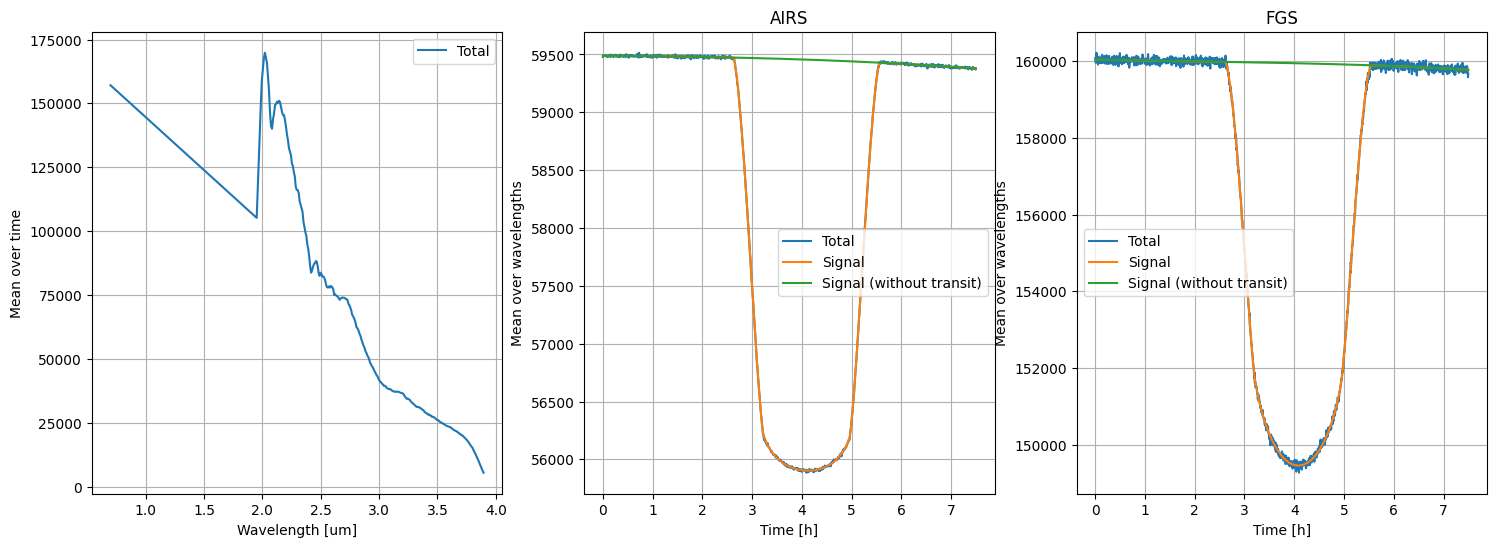

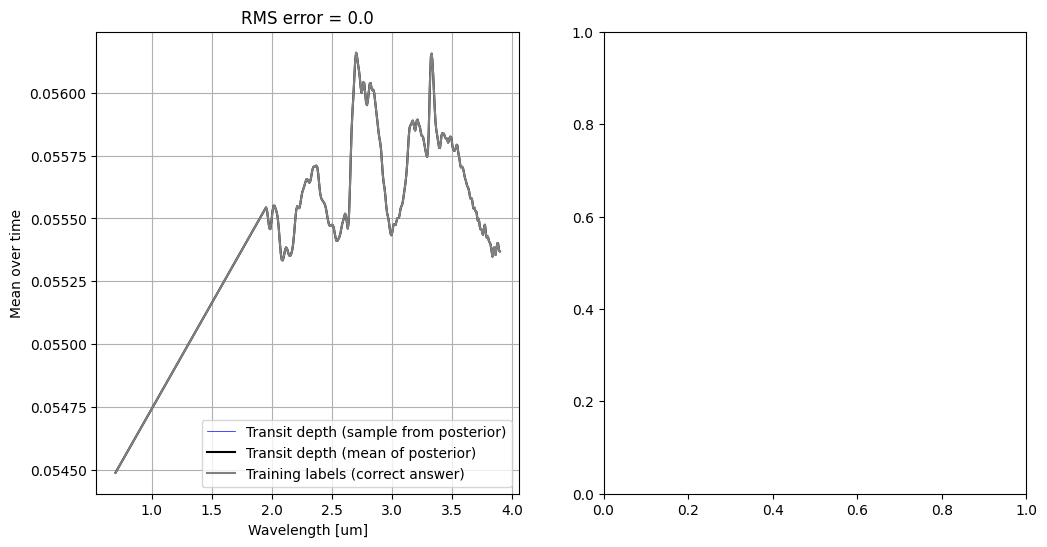

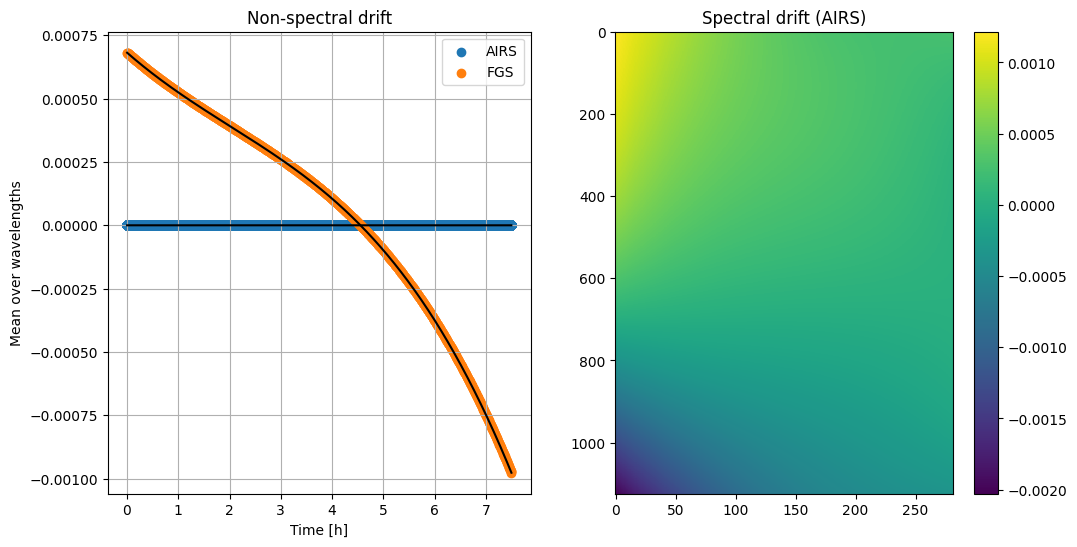

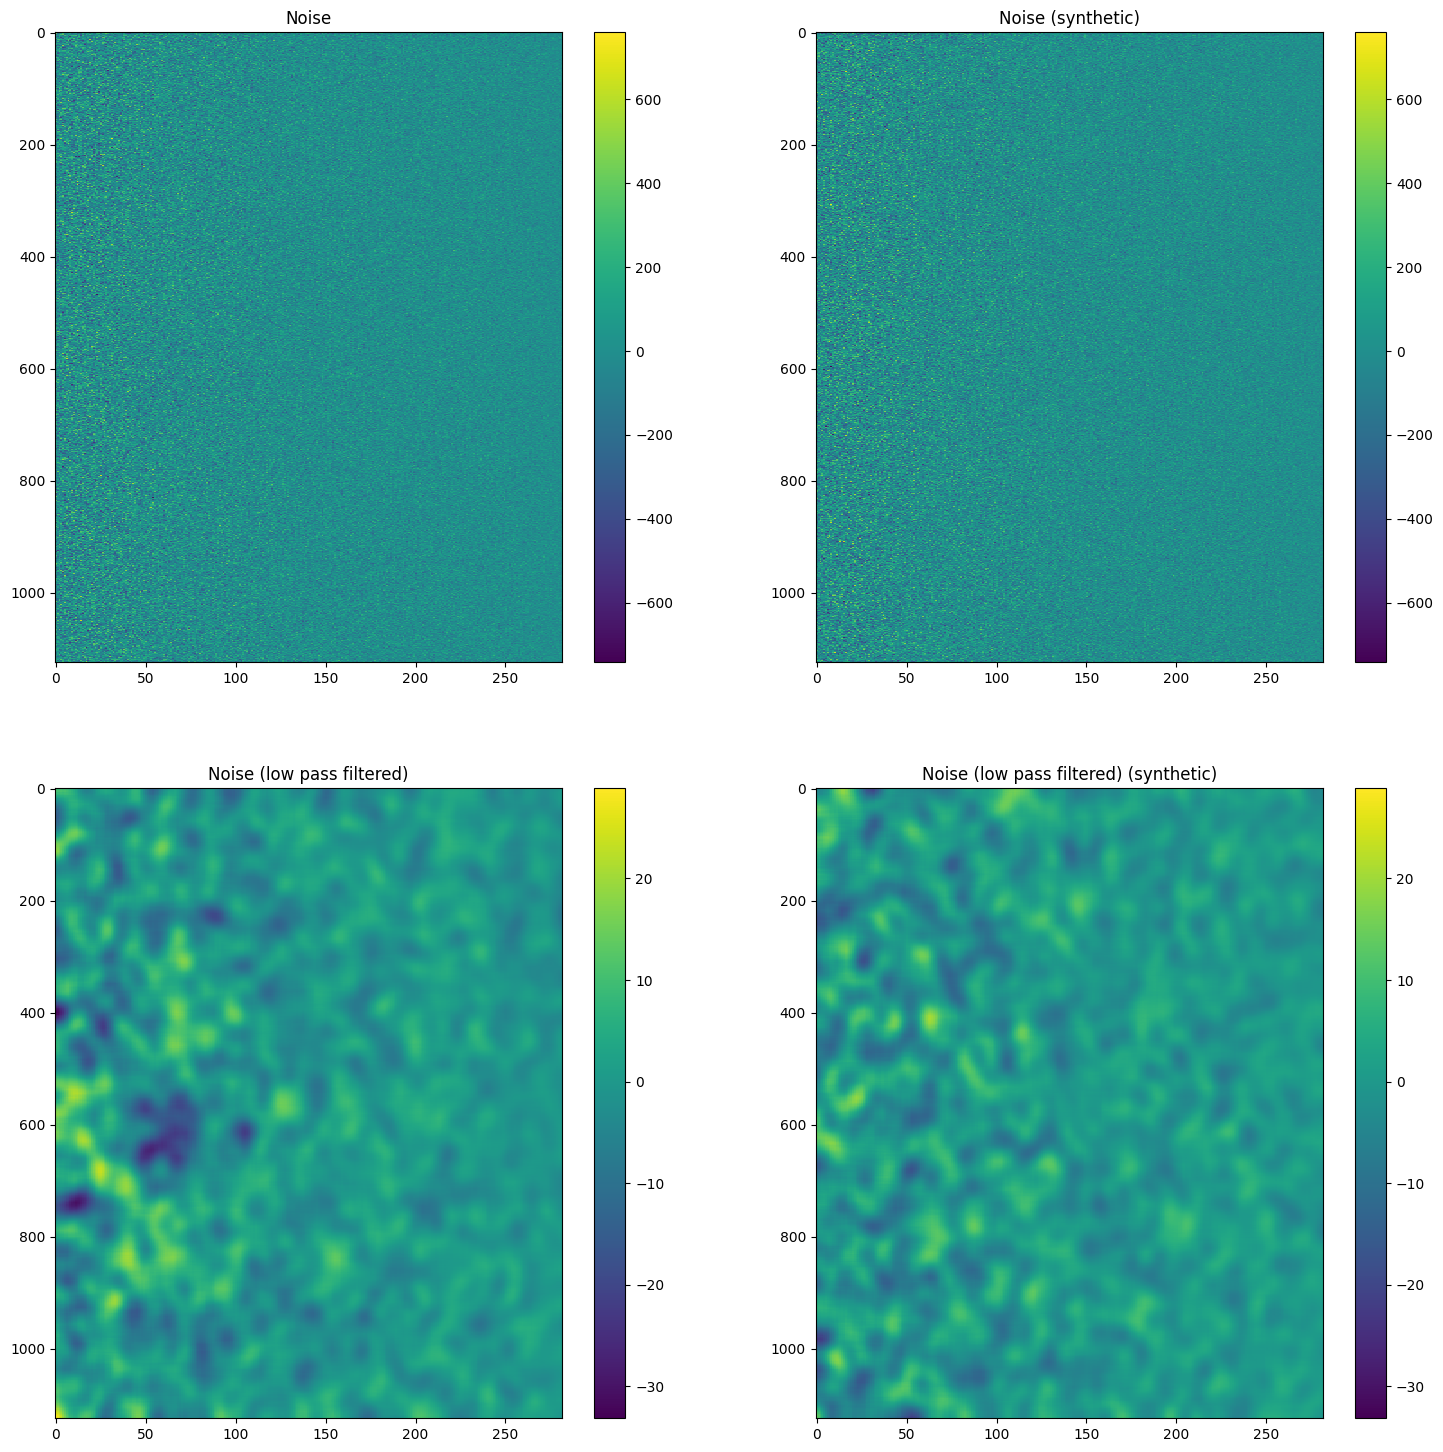

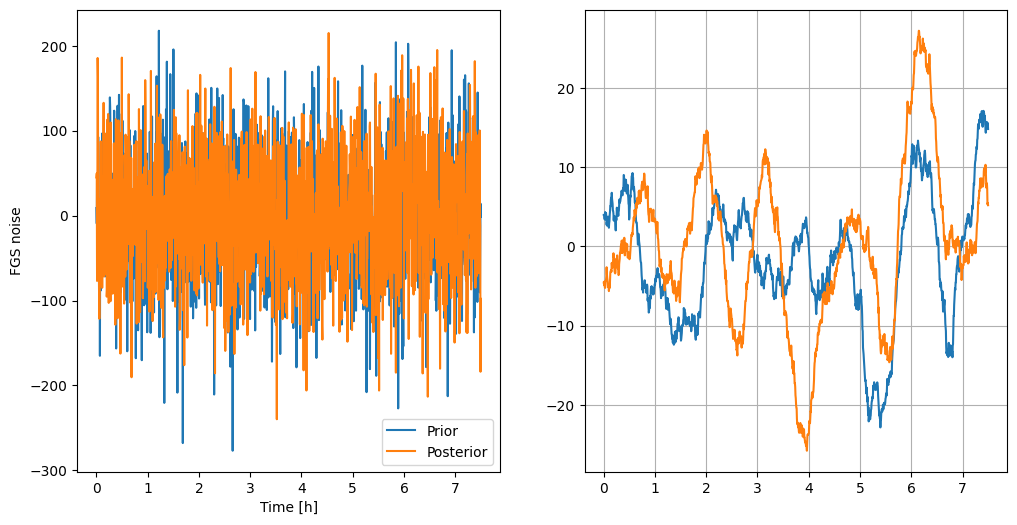

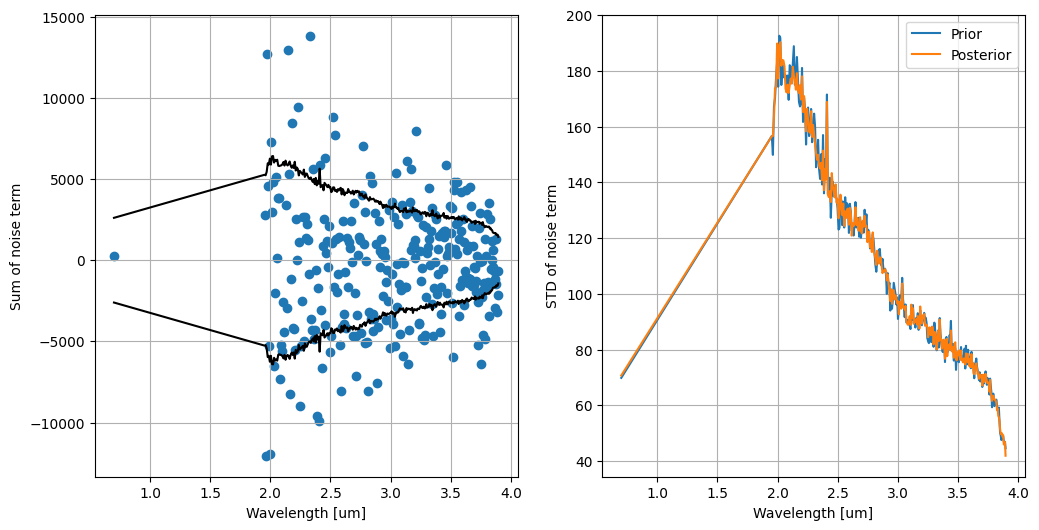

Score:           6.6535
RMS error FGS:   0.00000 ppm
mRMS error FGS:  0.00000 ppm
RMS error AIRS:  0.00000 ppm
mRMS error AIRS: 0.00000 ppm
RMS error AIRSv: 0.00000 ppm
mRMS error AIRSv:0.00000 ppm
CPU times: user 19.1 s, sys: 3.05 s, total: 22.1 s
Wall time: 24.1 s


(6.653470304657546, 0.0, 0.0)

In [6]:
%%time
import gp
import ariel_gp
import ariel_load_FGS
importlib.reload(ariel_load_FGS)
importlib.reload(ariel_load)
kgs.profiling=False
kgs.debugging_mode=1
kgs.sanity_checks_active=False
importlib.reload(gp)
importlib.reload(ariel_gp)
model = ariel_gp.PredictionModel()  
model.run_in_parallel=False
model.model_options.use_training_labels = True
model.starter_model.do_plots = False
model.plot_final = True
model.plot_simple = False
#model.model_options.include_background = False
#model.model_options.n_iter = 4
model.train(train_data)
#model.starter_model.loaders[0].cache_steps = [5]

for ii in range(2):                
    pass
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca = True                 
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[3] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[2] = 10000
    # model.loaders[ii].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[4] = True
    #model.loaders[ii].apply_pixel_corrections.mask_hot = False
    #model.loaders[ii].apply_pixel_corrections.mask_hot = False
#model.loaders[1].apply_full_sensor_corrections.remove_bad_pixels_pca_inputs[1] = 1
#model.loaders[0].cache_steps = []
model.starter_model.loaders = model.loaders


loaders = model.starter_model.loaders
model.model_options.n_iter = 7
#model.starter_model.transit_param[0].supersample_factor = 50
#loaders[1].noise_scaling = 1e4
#model.model_options.supersample_override[0]=50
#model.model_options.FGS_transit_override = ('linear',1)
#loaders[0].cache_steps= []
# loaders[0].apply_wavelength_binning = ariel_load_FGS.ApplyWavelengthBinningFGS2()
# loaders[0].apply_wavelength_binning.n_mean_pixels = 0
# loaders[0].apply_pixel_corrections.mask_hot = False
# loaders[0].apply_full_sensor_corrections.inpainting_2d = True
# loaders[0].apply_full_sensor_corrections.restore_invalids = True
# loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = True
# old_weights = copy.deepcopy(ariel_load_FGS.FGS_weights)
# ariel_load_FGS.FGS_weights *= 0
# ariel_load_FGS.FGS_weights[0,0] = old_weights[0,0]
#print(ariel_load_FGS.FGS_weights)
#ariel_load_FGS.FGS_weights[3] = 1
#model.model_options.FGS_order = 3
#model.model_options.AIRS_order = 3
#loaders[0].apply_wavelength_binning.options.use_sum = True
# loaders[1].apply_full_sensor_corrections.inpainting_wavelength = False
# loaders[1].apply_pixel_corrections.mask_hot = False
# loaders[1].apply_full_sensor_corrections.use_pca_for_background_removal = False
# loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = False
# loaders[1].apply_full_sensor_corrections.remove_background_remove_used_rows = False
# loaders[1].apply_wavelength_binning = ariel_load.ApplyWavelengthBinningAIRS2()
# loaders[1].apply_wavelength_binning.make_diagnostic_plots = False
# loaders[1].apply_wavelength_binning.residual_threshold = np.inf
# loaders[1].apply_wavelength_binning.sequential_fit = True


            
#model.loaders[0].cache_steps = [5]
data = [train_data[[d.planet_id for d in train_data].index(1843015807)]] # ingress and egress obscured
1349926825
data = [train_data[980+46]]
print(data[0].planet_id)
#data = [train_data[[d.planet_id for d in train_data].index(94572221)]]
#data = train_data[1003:1004]
#data = [train_data[[d.planet_id for d in train_data].index(2270815333)]] # ingress and egress obscured
data= copy.deepcopy(data)
for d in data:
    d.load_to_step(5,model.loaders)
    #d.transit_params[0].supersample_factor = 50
    d.transits = d.transits[:1]
    print(d.transit_params)
    #d.transit_params = copy.deepcopy(train_data[2].transit_params)
    #d.transits[0].data[0].data-=5000
    #d.transits[0].data[1].noise_est*=1000
#print('!!!')
#d.transits = d.transits[1:]
#%pyinstrument inferred_data = model.infer(data)
inferred_data = model.infer(data)
kgs.score_metric(inferred_data, data)
# model.starter_model.do_plots = False
# inferred_data_simple = model.starter_model.infer(data)
# kgs.score_metric(inferred_data_simple, data)

TransitParams(comment='', Rs=0.962907323977488, Ms=1.0580695821242594, Ts=4983.66019272985, Mp=0.7012890446099159, e=0.0, w=90.0, Rp=None, P=189.80901580093655, t0=4.122978707266509, sma=19.136297690842532, i=89.39263764678643, limb_dark='quadratic', u=array([0.15086906, 0.09142063]), expose_e_and_w=False)

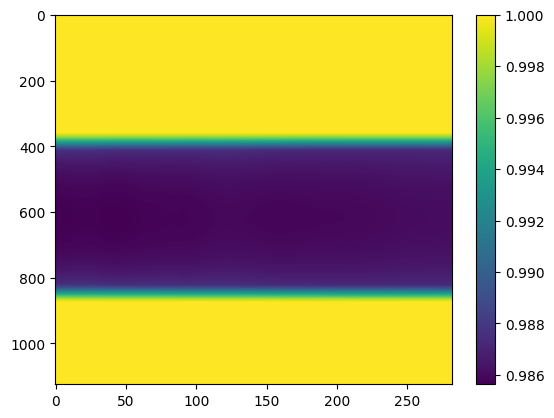

In [4]:
obs = copy.deepcopy(model.results['obs'])
m = copy.deepcopy(model.results['model_mean'])
obs.labels = m.m['signal'].m['main'].m['transit'].get_prediction(obs)
plt.figure()
plt.imshow(obs.export_matrix(True), aspect='auto', interpolation='none')
plt.colorbar()
m.m['signal'].m['main'].m['transit'].transit_params[0][1]

In [5]:
m = copy.deepcopy(model)
m.results['model_mean'].clear_all_caches()
m.results['model_samples'].clear_all_caches()
kgs.dill_save(kgs.temp_dir + 'test.pickle', m.results)

In [6]:
# data2 = copy.deepcopy(data)
# data2[0].transits = data2[0].transits[1:]
# inferred_data2 = model.infer(data2)

In [7]:
# plt.figure()
# plt.plot(3*(inferred_data2[0].spectrum - inferred_data[0].spectrum))
# plt.plot(data[0].spectrum-np.mean(data[0].spectrum))
# plt.figure()


In [8]:
# plt.figure()
# plt.plot(data[0].spectrum - inferred_data[0].spectrum)
# plt.figure()
# xx = data[0].spectrum
# plt.plot(xx-kgs.gaussian_2D_filter_with_nans(xx[:,None],[5,0.001])[:,0])
# # plt.plot(np.diff(data[0].spectrum))
# plt.plot((data[0].spectrum - inferred_data[0].spectrum))
# plt.figure()
# plt.scatter(xx-kgs.gaussian_2D_filter_with_nans(xx[:,None],[5,0.001])[:,0], data[0].spectrum - inferred_data2[0].spectrum)
# # plt.figure()
# # plt.scatter(np.diff(data[0].spectrum), (data[0].spectrum - inferred_data[0].spectrum)[:-1])
# # plt.figure()
# # plt.scatter(np.diff(data[0].spectrum,n=2), (data[0].spectrum - inferred_data[0].spectrum)[:-2])

In [9]:
5000/32/32

4.8828125

0.6733371082364351
-4.697924879203755
-5.18090609614428


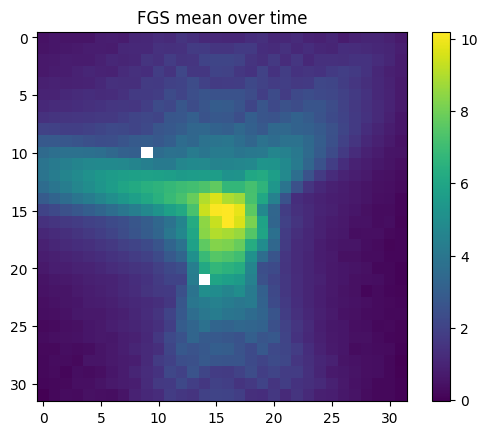

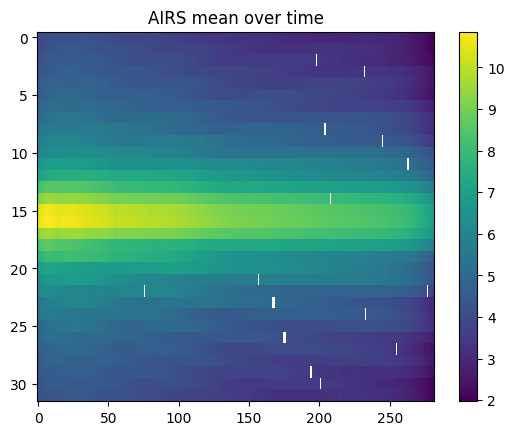

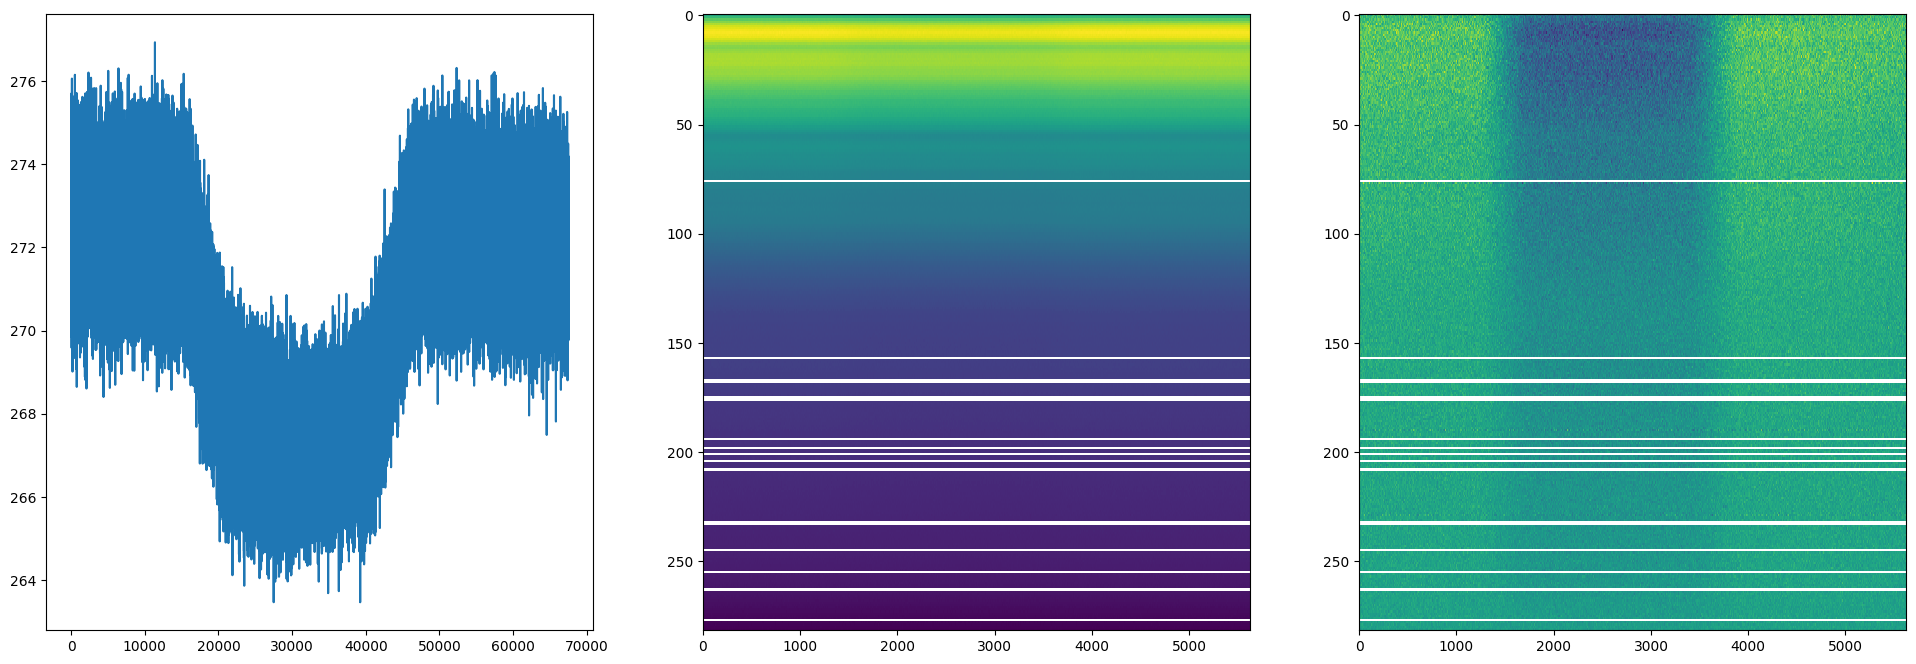

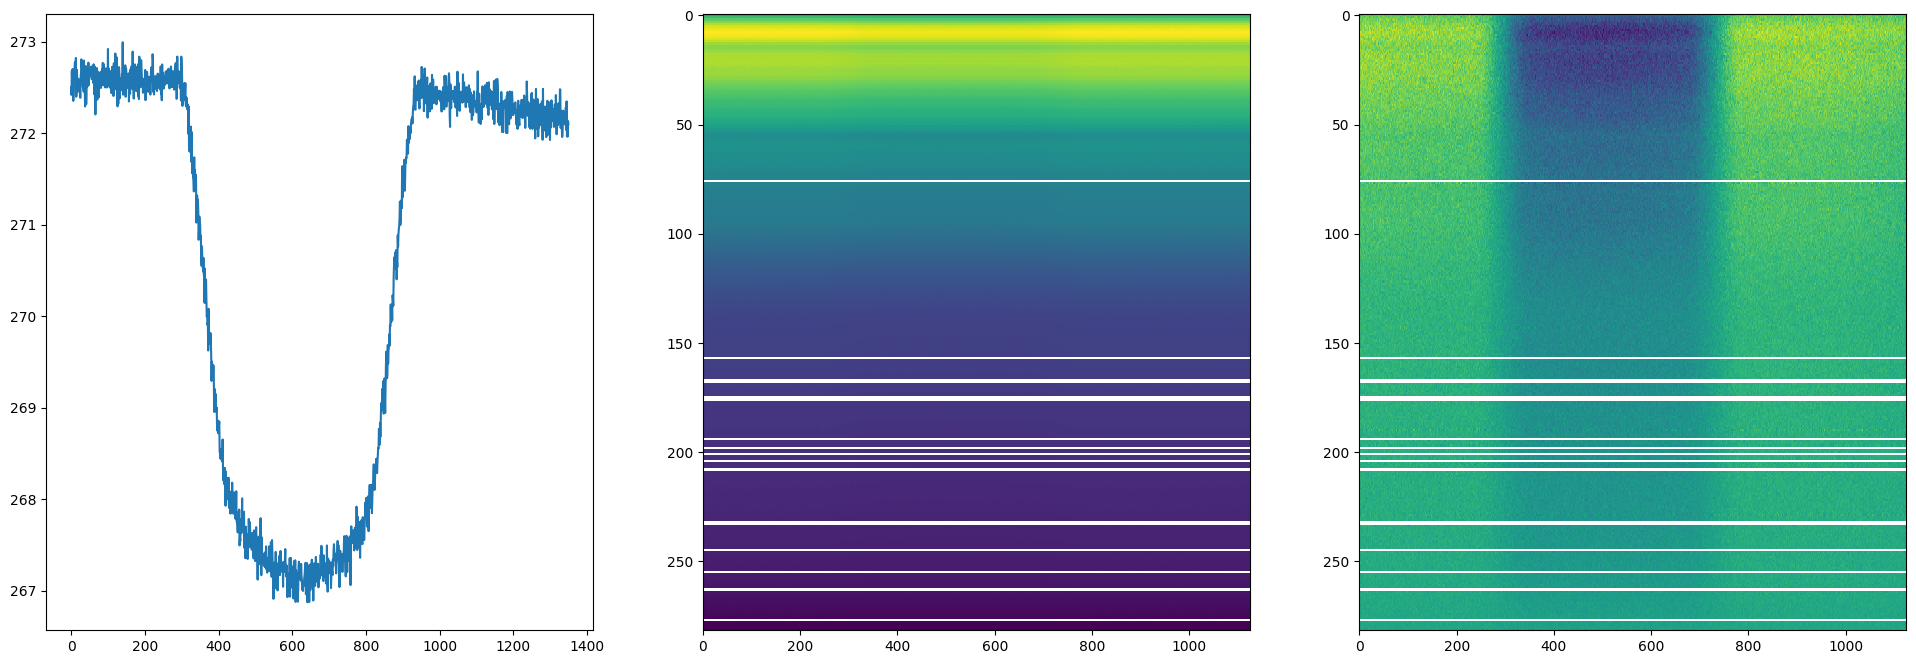

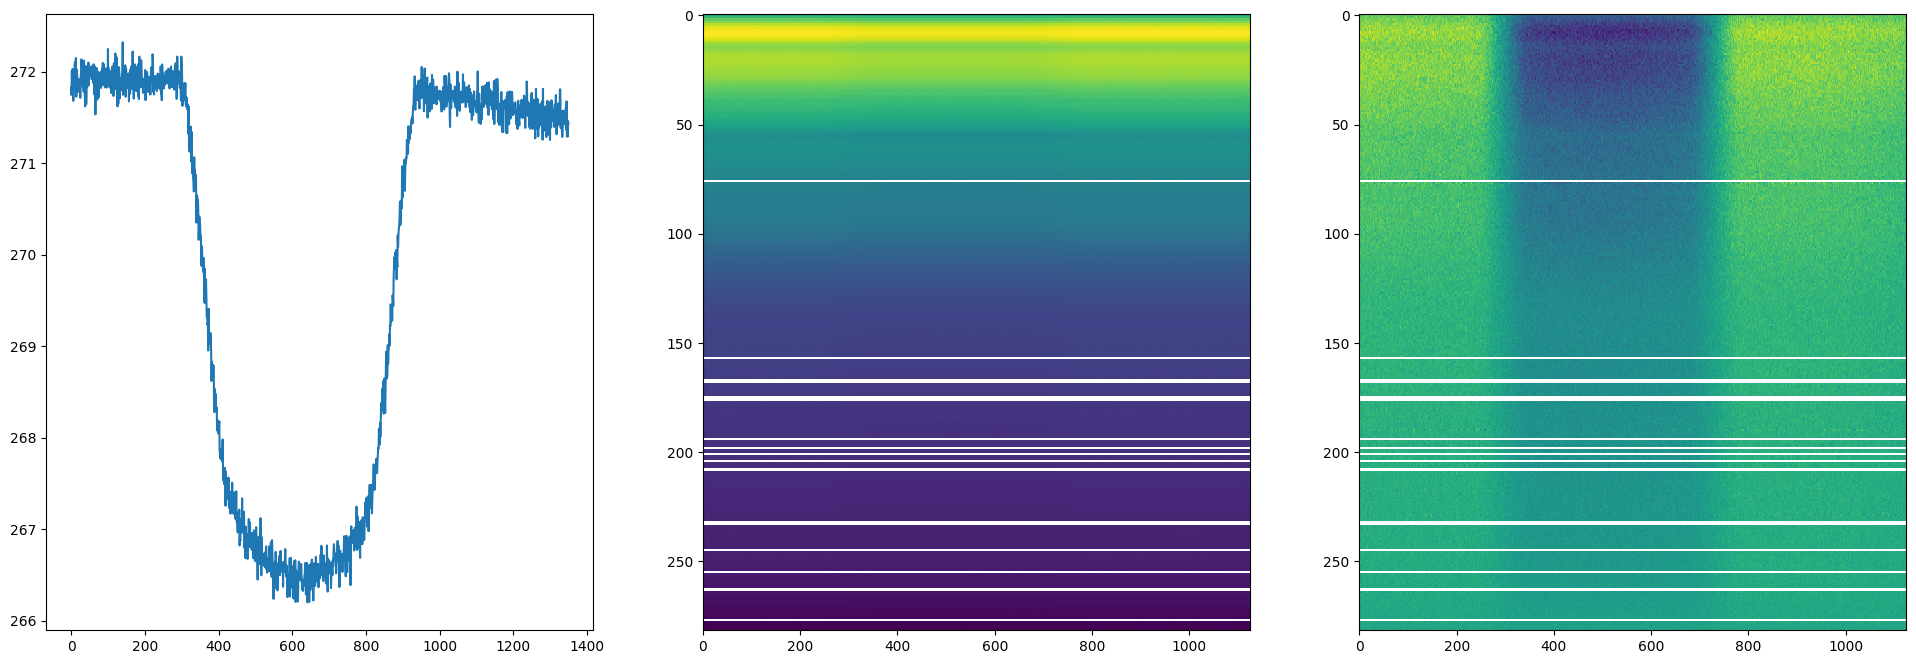

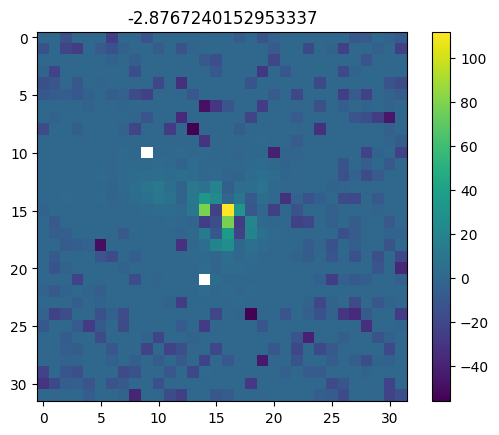

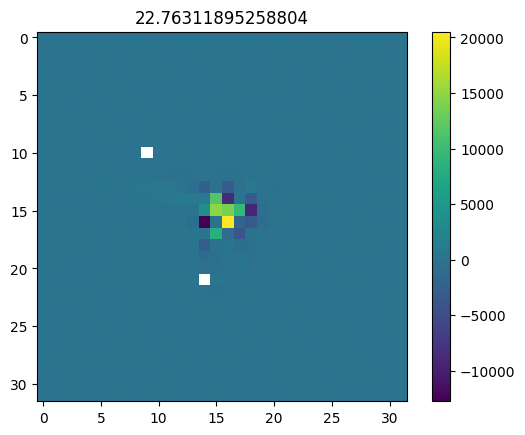

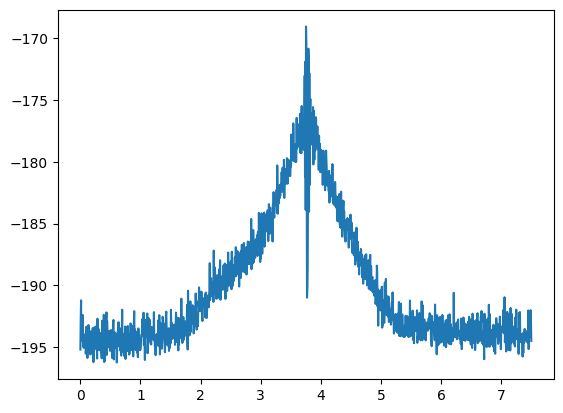

min 0.0 0.0
241646.57396702594


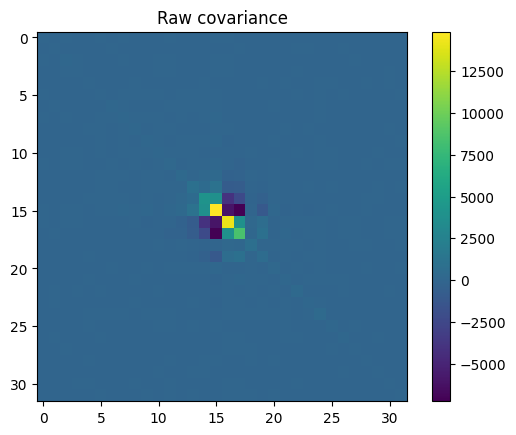

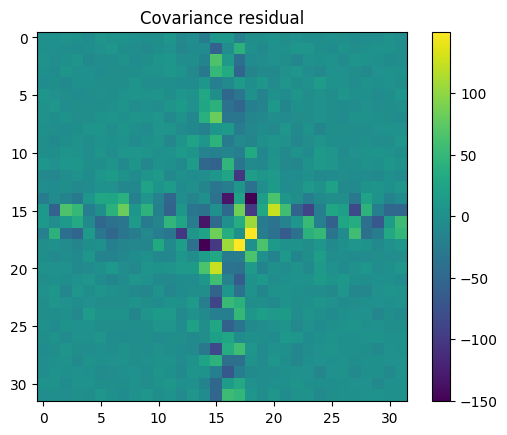

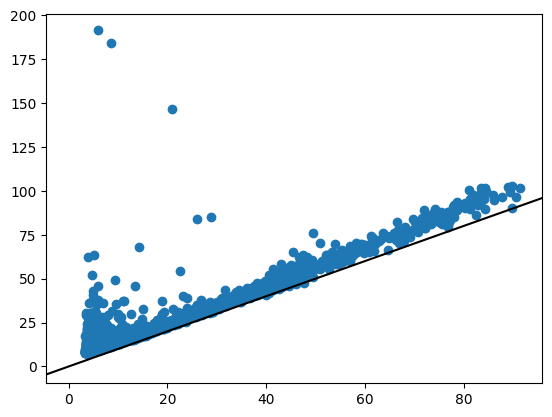

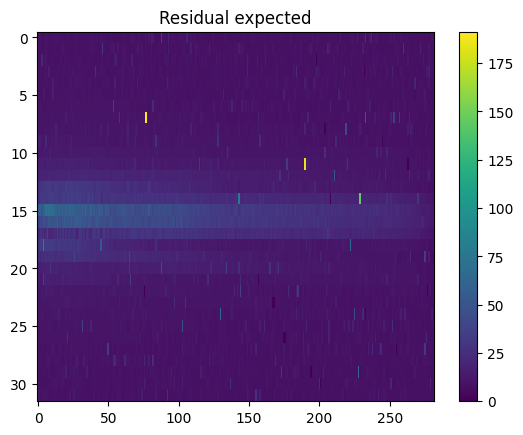

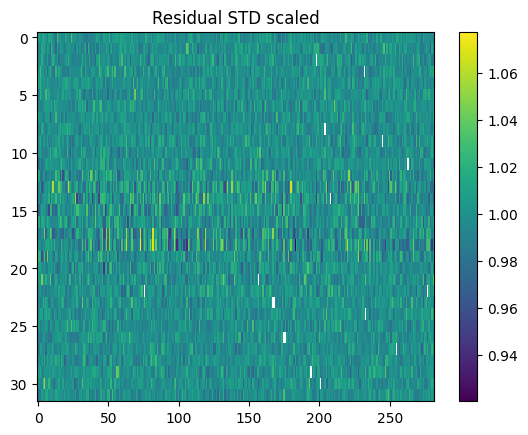

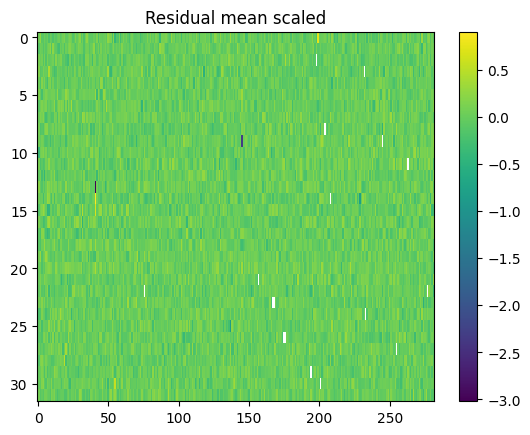

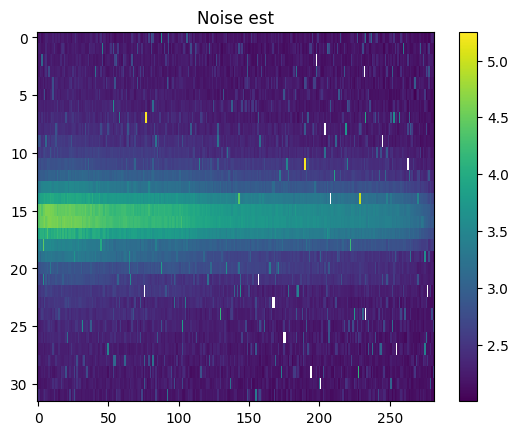

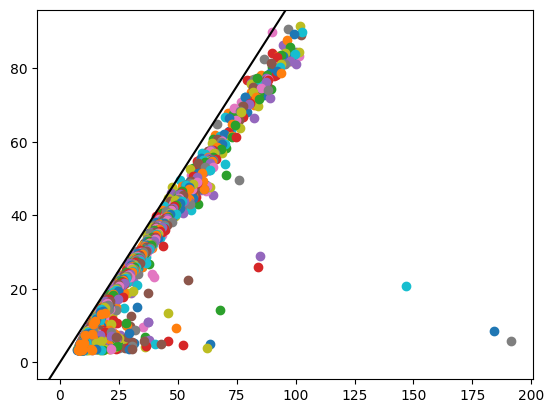

In [20]:
import ariel_load
importlib.reload(ariel_load)
importlib.reload(ariel_load_FGS)
loaders = ariel_load.default_loaders()
loaders[0].cache_steps = []
loaders[1].apply_pixel_corrections.mask_hot = False
d = copy.deepcopy(data[0])
#d.transits = d.transits[1:]
#d.transits[0].observation_number = 1
ariel_load.raw_data_diagnostics(copy.deepcopy(d), 0, loaders)
print(d.transits[0].data[0].data.flatten()[0])

In [11]:
import ariel_numerics
dd = copy.deepcopy(d)
dd.load_to_step(5, ariel_load.default_loaders())
n1 = ariel_numerics.remove_trend_cp(dd.transits[0].data[1].data).flatten()
n2 = ariel_numerics.remove_trend_cp(dd.transits[1].data[1].data).flatten()
plt.figure()
plt.scatter(n1.get(),n2.get())

IndexError: list index out of range

In [ ]:
len(data[0].transits)

In [ ]:
len(d.transits)